In [1]:
import pandas as pd # for data manipulation
import os # for file path operations
import sys # for system-specific parameters and functions
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for better aesthetics
import numpy as np # for numerical operations
import nltk # for text processing

In [3]:
#ensure that Python can import modules from the parent directory of your notebook
rpath = os.path.abspath('..')
print(rpath)
if rpath not in sys.path:
    sys.path.insert(0, rpath)


c:\Users\elsha\OneDrive\Documents\10Acadamy Assignments\week-1\Nova-Finance


In [4]:
os.path.abspath('..')

# os.path.abspath('..')
print(os.listdir("../scripts"))

['analyze_sentiment.py', 'analyze_stock_data.py', 'convert_and_align_date.py', 'load_data.py', '__init__.py', '__pycache__']


In [5]:
from scripts.load_data import load_data # import the load_data function from scripts
news = '../Data/raw_analyst_ratings.csv'
stock = '../Data/AAPL_historical_data.csv'
aligned_data = load_data(news, stock)
# stock_data = stock_data.rename(columns={'Date': 'date'})

In [6]:
aligned_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0


In [7]:
# from scripts.sentiment import get_sentiment, apply_sentiment_analysis
from scripts.analyze_sentiment import analyze_and_display_sentiment
analyze_and_display_sentiment(aligned_data, 'headline')
aligned_data.head()

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.0


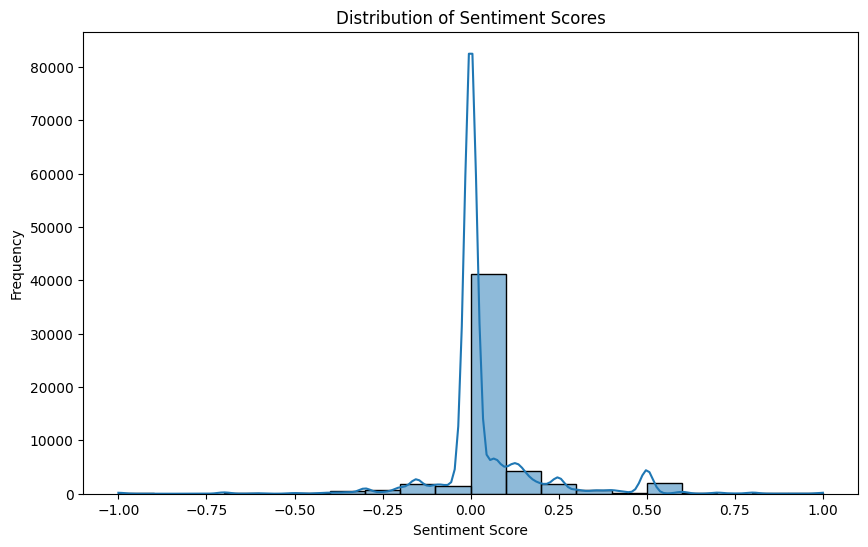

In [8]:
from scripts.plot_sentiment import plot_sentiment_distribution
plot_sentiment_distribution(aligned_data)

In [9]:
from scripts.calculate_daily_returns import calculate_daily_returns
calculate_daily_returns(aligned_data)
# Drop the first row with NaN values due to pct_change()
aligned_data = aligned_data.dropna()
print(aligned_data[['date', 'Close', 'daily_return']].head())


         date      Close  daily_return
1  2020-06-03  81.279999     -0.019246
2  2020-05-26  79.182503     -0.025806
3  2020-05-22  79.722504      0.006820
4  2020-05-22  79.722504      0.000000
5  2020-05-22  79.722504      0.000000


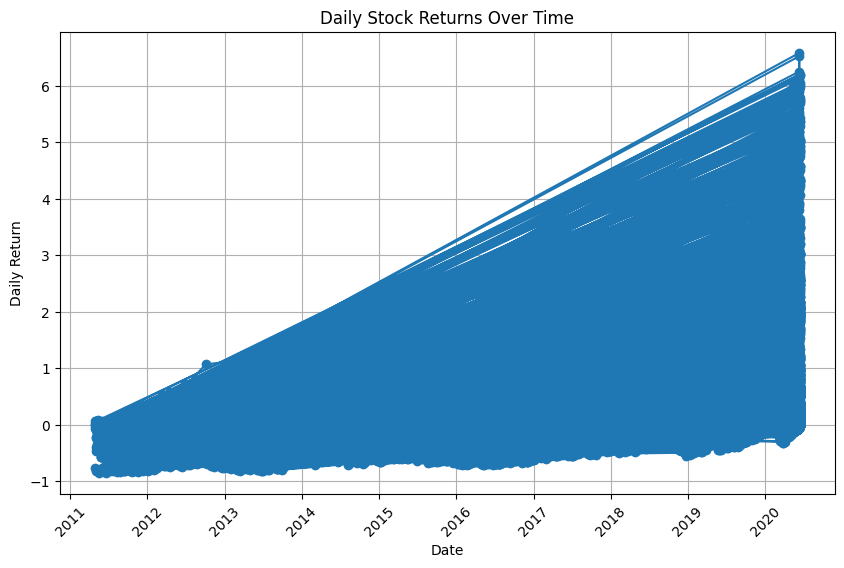

In [10]:
from scripts.plot_daily_returns_over_time import plot_daily_returns_over_time
plot_daily_returns_over_time(aligned_data)

In [11]:
from scripts.calculate_daily_sentiment_and_merge import calculate_daily_sentiment_and_merge
final_data = calculate_daily_sentiment_and_merge(aligned_data)
final_data.head()

,date,sentiment,daily_return
0,2011-04-28,0.045455,0.065939
1,2011-04-28,0.045455,0.000260
2,2011-04-28,0.045455,0.018266
3,2011-04-29,0.166667,-0.063072
4,2011-04-29,0.166667,-0.765523


In [12]:
correlation = final_data['sentiment'].corr(final_data['daily_return'])
print(f"Correlation between daily sentiment scores and stock returns: {correlation}")


Correlation between daily sentiment scores and stock returns: -0.02452306649230877


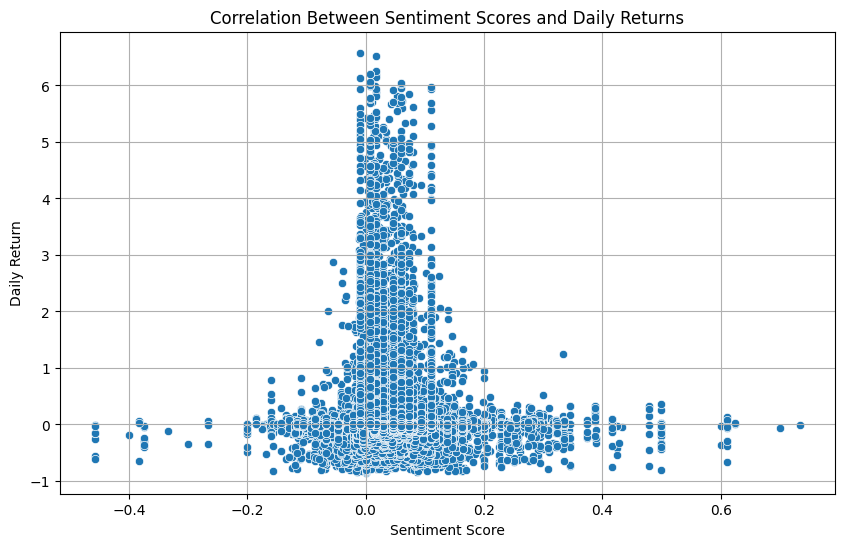

In [13]:
from scripts.plot_sentiment_vs_daily_return import plot_sentiment_vs_daily_return
plot_sentiment_vs_daily_return(final_data)

ADD VISUALIZATIONS

In [14]:
# Calculate rolling averages
window_size = 7  # Number of days for rolling average

final_data['rolling_sentiment'] = final_data['sentiment'].rolling(window=window_size).mean()
final_data['rolling_return'] = final_data['daily_return'].rolling(window=window_size).mean()


In [ ]:
from scripts.plot_rolling_averages import plot_rolling_averages
plot_rolling_averages(final_data)

In [15]:
correlation_matrix = final_data[['sentiment', 'daily_return']].corr()

In [ ]:
from scripts.plot_correlation_heatmap import plot_correlation_heatmap
plot_correlation_heatmap(correlation_matrix)

['analyze_stock_data.py', 'convert_and_align_date.py', 'load_data.py', '__init__.py', '__pycache__']
